In [9]:
# utility file to get some stats on the data

import glob
import json
import matplotlib.pyplot as plt

data_dir = "../webapp/data/"

language_codes = [f.split("/")[-1] for f in glob.glob(f"{data_dir}/languages/*")]
print("Total languages:", len(language_codes))

# load the 5words.txt file in each language and count the number of words
for code in language_codes:
    with open(f"{data_dir}languages/{code}/{code}_5words.txt") as f:
        words = f.read().split("\n")
        print(f"{code}: {len(words)} words")



Total languages: 59
ie: 1669 words
ko: 8888 words
ne: 19 words
sl: 6814 words
nl: 2957 words
lb: 312 words
hu: 4605 words
fr: 3374 words
oc: 3978 words
en: 2310 words
ia: 2262 words
mk: 4127 words
ga: 2844 words
tr: 6653 words
is: 633 words
it: 1386 words
ru: 3822 words
pt: 7090 words
es: 3030 words
lv: 2306 words
br: 2254 words
ca: 6437 words
hr: 2933 words
et: 9578 words
ltg: 368 words
sr: 1 words
pl: 5182 words
he: 64476 words
vi: 1 words
fa: 7704 words
eu: 5986 words
uk: 4355 words
ro: 5023 words
fur: 2591 words
fy: 181 words
ar: 13883 words
tk: 5660 words
mn: 3766 words
gd: 4110 words
sk: 3673 words
la: 4725 words
tlh: 1 words
nds: 334 words
bg: 3383 words
hy: 3187 words
nn: 7445 words
cs: 4774 words
eo: 2243 words
hyw: 3133 words
el: 1 words
da: 4164 words
rw: 21 words
fo: 4453 words
sv: 4148 words
nb: 6536 words
de: 1952 words
gl: 3263 words
lt: 1400 words
ka: 1303 words


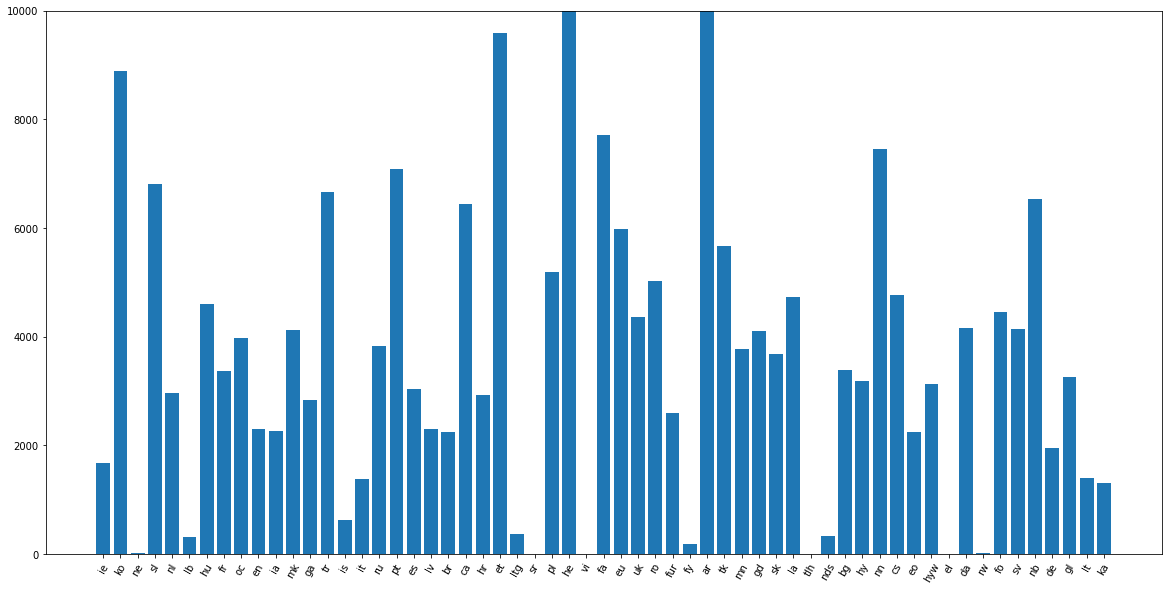

In [44]:
# plot the number of words for each language
n_words = {}
for code in language_codes:
    with open(f"{data_dir}languages/{code}/{code}_5words.txt") as f:
        words = f.read().split("\n")
        n_words[code] = len(words)

# plot
plt.figure(figsize=(20, 10))
plt.ylim(0, 10000)
plt.bar(range(len(n_words)), list(n_words.values()))
plt.xticks(range(len(n_words)), list(n_words.keys()), rotation=60)
plt.savefig("out/n_words.png")
plt.show()

In [43]:
# print a status list for the README

with open(f"{data_dir}/languages.json", "r") as f:
    languages_data = json.load(f)

def load_supplemental_words(lang):
    try:
        with open(f"{data_dir}languages/{lang}/{lang}_5words_supplement.txt", "r") as f:
            supplemental_words = [line.strip() for line in f]
    except FileNotFoundError:
        supplemental_words = []
    return supplemental_words

with open("out/status_list.txt", "w", encoding="utf-8") as f:
    for code in language_codes:
        with open(f"{data_dir}languages/{code}/{code}_5words.txt") as g:
            words = g.read().split("\n")
            words_supplement = load_supplemental_words(code)
            status_emoji = "🟥"
            if len(words) + len(words_supplement) > 500:
                status_emoji = "🟧"
            if len(words) + len(words_supplement) > 1000:
                status_emoji = "🟨"
            # if we've added words to the supplemental list, then we probably have a pretty good
            # "good words" + "possible" words list, thus green status emoji
            if len(words_supplement) > 2:
                status_emoji = "🟩"
            language_name = languages_data[code]['language_name']
            f.write(f"  - {language_name[:]} ({code}): {' '*(25-(len(language_name)+len(code)))} {status_emoji} ({len(words) + len(words_supplement)} words)\n")